                                   Regression & Its Evaluation | Assignment

1: What is Simple Linear Regression?

Ans:- Simple linear regression is a statistical method that uses a straight line to model the relationship between a single independent (predictor) variable and a single dependent (response) variable.

2. What are the key assumptions of Simple Linear Regression?

Ans:- The key assumptions of simple linear regression are linearity, independence, homoscedasticity, and normality of residuals.

3. What is heteroscedasticity, and why is it important to address in regression models?

Ans:- Heteroscedasticity is a condition in regression where the variance of the error term is not constant; instead, it changes systematically with the independent variables. It is important to address because it violates a key assumption of Ordinary Least Squares (OLS) regression, leading to biased standard errors, which makes statistical significance tests (like t-tests and F-tests) unreliable.

4. What is Multiple Linear Regression?

Ans:- Multiple linear regression is a statistical method that uses two or more independent variables to predict the outcome of a single dependent variable.

5. What is polynomial regression, and how does it differ from linear regression?

Ans:- Polynomial regression extends linear regression by adding higher-degree terms, allowing it to model more complex, curvilinear relationships.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

Regression Equation: Y = 0.18 + 1.98X


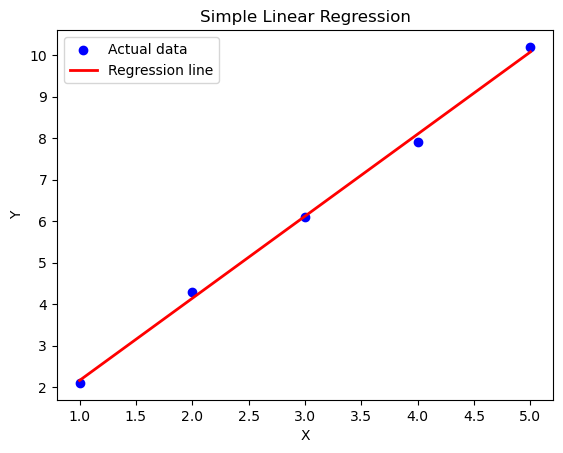

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature matrix
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Target vector

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict Y values
Y_pred = model.predict(X)

# Print the regression equation
print(f"Regression Equation: Y = {intercept:.2f} + {slope:.2f}X")

# Plot the data points
plt.scatter(X, Y, color='blue', label='Actual data')

# Plot the regression line
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()

# Show the plot
plt.show()

7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results

In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create a DataFrame
data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

# Define features (independent variables) and target (dependent variable)
X = data[['Area', 'Rooms']]
y = data['Price']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

# ---- Checking for Multicollinearity using VIF ----
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) values:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0377
Time:                        18:40:44   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve

Polynomial Regression Equation: Y = 0.06 + 1.94X + 0.20X²


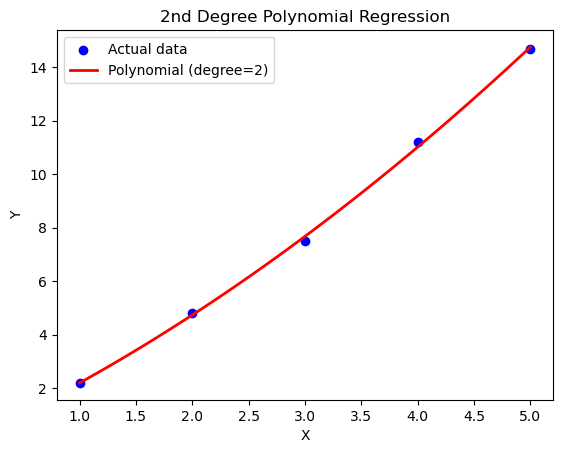

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict Y values
Y_pred = model.predict(X_poly)

# Print regression equation
b0 = model.intercept_
b1, b2 = model.coef_[1], model.coef_[2]
print(f"Polynomial Regression Equation: Y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X²")

# Plot the data points
plt.scatter(X, Y, color='blue', label='Actual data')

# Plot the polynomial regression curve
X_curve = np.linspace(1, 5, 100).reshape(-1, 1)
Y_curve = model.predict(poly.transform(X_curve))
plt.plot(X_curve, Y_curve, color='red', linewidth=2, label='Polynomial (degree=2)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd Degree Polynomial Regression')
plt.legend()

# Show the plot
plt.show()

9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

Regression Equation: Y = 6.50 + 1.15X


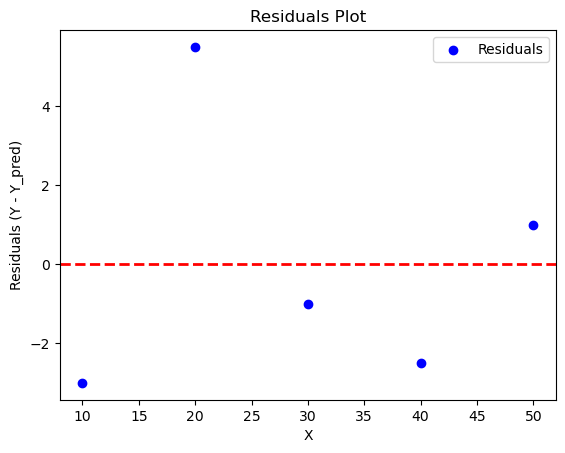

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print model equation
print(f"Regression Equation: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X")

# Plot residuals
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Residuals (Y - Y_pred)')
plt.title('Residuals Plot')
plt.legend()
plt.show()

# ---- Assessing Heteroscedasticity ----
print("Residuals:", residuals)

10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Ans:-To address heteroscedasticity and multicollinearity, first address multicollinearity by removing redundant features or creating new ones like a principal component score, then tackle heteroscedasticity by using weighted least squares regression or transforming the target variable, and finally, evaluate the model's performance with appropriate metrics.